In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
civilian_df = pd.read_pickle('./dataframes/civ_inc_df.pkl')

In [3]:
incident_df = pd.read_pickle('./dataframes/incident_df.pkl')

In [4]:
# Population data source: http://www.dof.ca.gov/Forecasting/Demographics/Estimates/E-1/

counties_pop = pd.read_csv('./dataframes/Untitled spreadsheet - Sheet1.csv')

In [5]:
counties_pop['Population'] = counties_pop['Population'].str.replace(',', '')

counties_pop['Population'] = counties_pop['Population'].apply(int)

In [6]:
counties_pop['%'] = [(x/counties_pop['Population'].sum())*100 for x in counties_pop['Population']]

In [7]:
counties_pop = counties_pop.set_index('County')

In [8]:
# Counties that did NOT report any incidents of use of force.

drop_counties = ['Alpine', 'Sierra', 'Trinity', 'Mono', 'Colusa', 'Amador', 'Tuolumne', 'Marin']

In [9]:
counties_pop = counties_pop.drop(drop_counties, axis=0)

In [10]:
incidents_county = pd.DataFrame(incident_df['County'].value_counts())

incidents_county.columns = ['# of incidents']

incidents_county['%'] = [(x/incidents_county['# of incidents'].sum())*100 for x in incidents_county['# of incidents']]

incidents_county.columns = ['# of incidents', '% of incidents']

# Set it to be sorted alphabetically by county so that both dataframes match.

incidents_county = incidents_county.sort_index()

In [11]:
incidents_county['Population'] = counties_pop['Population'].values

In [12]:
incidents_county['% of Pop'] = counties_pop['%'].values

In [13]:
incidents_county.head()

,# of incidents,% of incidents,Population,% of Pop
Alameda County,20,2.557545,1629233,4.157370
Butte County,4,0.511509,224703,0.573382
Calaveras County,2,0.255754,45246,0.115456
Contra Costa County,27,3.452685,1126824,2.875355
Del Norte County,1,0.127877,27006,0.068912


In [14]:
incidents_county['% difference'] = [row['% of incidents'] - row['% of Pop'] for idx, row in incidents_county.iterrows()]

In [15]:
incidents_county.sort_values(by='% difference', ascending=False).head(10)

,# of incidents,% of incidents,Population,% of Pop,% difference
San Bernardino County,71,9.079284,2135724,5.449800,3.629484
Kern County,36,4.603581,886803,2.262886,2.340695
Riverside County,60,7.672634,2348213,5.992015,1.680619
Los Angeles County,212,27.109974,10182961,25.984210,1.125765
San Joaquin County,23,2.941176,735677,1.877252,1.063924
Fresno County,26,3.324808,985079,2.513660,0.811148
Santa Barbara County,15,1.918159,447295,1.141378,0.776781
Tulare County,14,1.790281,466563,1.190545,0.599737
Contra Costa County,27,3.452685,1126824,2.875355,0.577330
Yuba County,5,0.639386,74328,0.189665,0.449721


In [16]:
top_10 = incidents_county.sort_values(by='% of incidents', ascending=False).head(10)

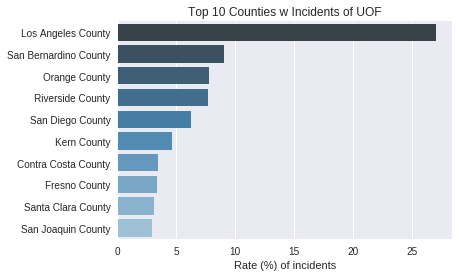

In [17]:
sns.barplot(top_10['% of incidents'], top_10.index, palette='Blues_d', )
plt.title('Top 10 Counties w Incidents of UOF')
plt.xlabel('Rate (%) of incidents')

## Death Incident Rate

In [18]:
county_death_count = []

for x in top_10.index:
    df = civilian_df[civilian_df['County'] == x]
    death_count = df[df['Injury_Level'] == 'Death'].shape[0]
    county_death_count.append(death_count)

In [19]:
county_death_count

[55, 9, 12, 13, 9, 5, 4, 4, 2, 7]

In [20]:
top_10['# of deaths'] = county_death_count

In [21]:
top_10.columns = ['# of incidents', '% of total UoF incidents', 'Population', '% of total pop',
       '% difference', '# of deaths', 'death rate (%)']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [22]:
top_10

,# of incidents,% of incidents,Population,% of Pop,% difference,# of deaths
Los Angeles County,212,27.109974,10182961,25.984210,1.125765,55
San Bernardino County,71,9.079284,2135724,5.449800,3.629484,9
Orange County,61,7.800512,3172152,8.094489,-0.293977,12
Riverside County,60,7.672634,2348213,5.992015,1.680619,13
San Diego County,49,6.265985,3286717,8.386828,-2.120843,9
Kern County,36,4.603581,886803,2.262886,2.340695,5
Contra Costa County,27,3.452685,1126824,2.875355,0.577330,4
Fresno County,26,3.324808,985079,2.513660,0.811148,4
Santa Clara County,24,3.069054,1922619,4.906013,-1.836959,2
San Joaquin County,23,2.941176,735677,1.877252,1.063924,7


In [23]:
death_rate_list = []

for indx, row in top_10.iterrows():
    death_rate = (row['# of deaths']/row['# of incidents'])*100
    death_rate_list.append(death_rate)

In [24]:
death_rate_list

[25.943396226415093,
 12.676056338028168,
 19.672131147540984,
 21.666666666666668,
 18.367346938775512,
 13.888888888888889,
 14.814814814814813,
 15.384615384615385,
 8.3333333333333321,
 30.434782608695656]

In [25]:
top_10['death rate (%)'] = death_rate_list

In [26]:
top_10.sort_values(by='death rate (%)', ascending=False)

,# of incidents,% of incidents,Population,% of Pop,% difference,# of deaths,death rate (%)
San Joaquin County,23,2.941176,735677,1.877252,1.063924,7,30.434783
Los Angeles County,212,27.109974,10182961,25.984210,1.125765,55,25.943396
Riverside County,60,7.672634,2348213,5.992015,1.680619,13,21.666667
Orange County,61,7.800512,3172152,8.094489,-0.293977,12,19.672131
San Diego County,49,6.265985,3286717,8.386828,-2.120843,9,18.367347
Fresno County,26,3.324808,985079,2.513660,0.811148,4,15.384615
Contra Costa County,27,3.452685,1126824,2.875355,0.577330,4,14.814815
Kern County,36,4.603581,886803,2.262886,2.340695,5,13.888889
San Bernardino County,71,9.079284,2135724,5.449800,3.629484,9,12.676056
Santa Clara County,24,3.069054,1922619,4.906013,-1.836959,2,8.333333


In [27]:
top_10.to_pickle('./dataframes/top_10_counties.pkl')

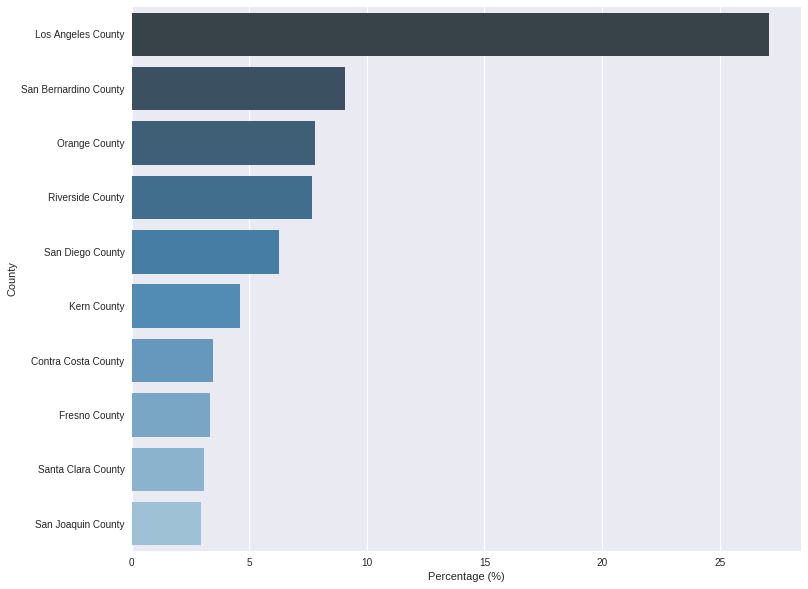

In [34]:
fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(ax=ax, x='% of incidents', y=top_10.index, data=top_10, palette="Blues_d")
plt.xlabel('Percentage (%)')
plt.ylabel('County')


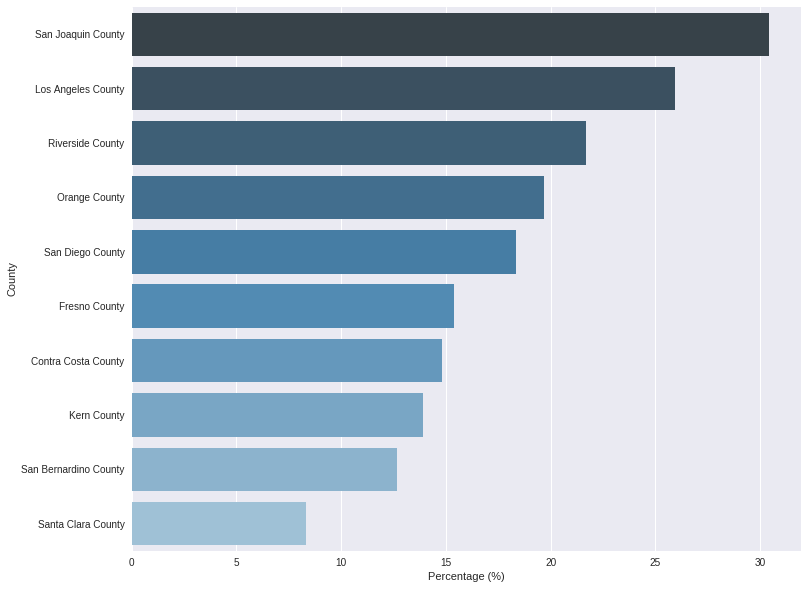

In [37]:
fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(ax=ax, x='death rate (%)', y=top_10.sort_values(by='death rate (%)', ascending=False).index, data=top_10.sort_values(by='death rate (%)', ascending=False), palette="Blues_d")
plt.xlabel('Percentage (%)')
plt.ylabel('County')
